# **Importing data from Kaggle**

In [59]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("CooperUnion/cardataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/CooperUnion/cardataset/versions/1


# **Importing Required Lib**

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Uploading Dataset and View the Data Frame**

In [65]:
df = pd.read_csv("/content/EDA_data.csv")
df.head(5)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


# **Checking Data Types**

In [66]:
df.dtypes

,0
Make,object
Model,object
Year,int64
Engine Fuel Type,object
Engine HP,float64
Engine Cylinders,float64
Transmission Type,object
Driven_Wheels,object
Number of Doors,float64
Market Category,object


# **Dropping Irrelevant Data Types**

In [67]:
df = df.drop(['Engine Fuel Type', 'Market Category', 'Vehicle Style', 'Popularity', 'Number of Doors', 'Vehicle Size'], axis=1)
df.head(5)

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


# **Renaming Confusing Columns**

In [68]:
df = df.rename(columns={"Engine Fuel Tpye": "Fuel", "Engine HP": "HP","Engine Cylinders": "Cylinders","Driven_Wheels":"Wheels","Transmission Type":"Type","Number of Doors": "Doors","highway MPG": "MPG","city mpg":"MPG","MSRP":"Price"})
df.head(5)

,Make,Model,Year,HP,Cylinders,Type,Wheels,MPG,MPG,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


# **Dropping Duplicates & Null Values**

In [69]:
df.shape

(11914, 10)

In [70]:
duplicate_rows_df = df[df.duplicated()]
print("No. of Duplicates",duplicate_rows_df.shape)

No. of Duplicates (989, 10)


In [71]:
df.isnull().sum()

,0
Make,0
Model,0
Year,0
HP,69
Cylinders,30
Type,0
Wheels,0
MPG,0
MPG,0
Price,0


In [72]:
df= df.dropna()
df.count()

,0
Make,11816
Model,11816
Year,11816
HP,11816
Cylinders,11816
Type,11816
Wheels,11816
MPG,11816
MPG,11816
Price,11816


In [73]:
df.isnull().sum()

,0
Make,0
Model,0
Year,0
HP,0
Cylinders,0
Type,0
Wheels,0
MPG,0
MPG,0
Price,0


# **Detecting Outliers**

<Axes: xlabel='Price'>

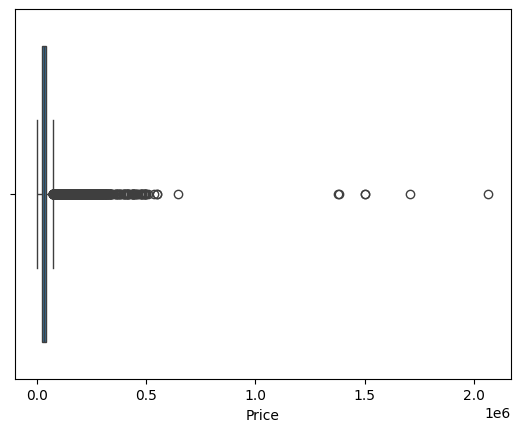

In [74]:
sns.boxplot(x=df['Price'])

<Axes: xlabel='HP'>

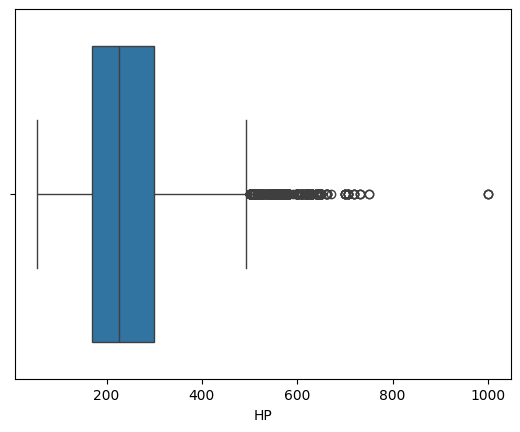

In [75]:
sns.boxplot(x=df['HP'])

<Axes: xlabel='Cylinders'>

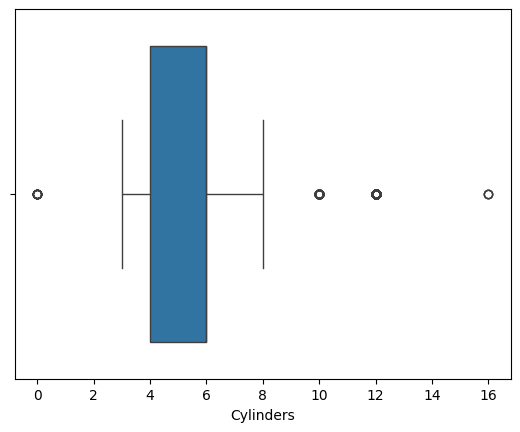

In [76]:
sns.boxplot(x=df['Cylinders'])

In [77]:
df_numeric = df.select_dtypes(include=['number'])

In [78]:
Q1 = df_numeric.quantile(0.25)
Q3 = df_numeric.quantile(0.75)
IQR = Q3 - Q1

print("Interquartile Range (IQR):\n", IQR)


Interquartile Range (IQR):
 Year             9.0
HP             130.0
Cylinders        2.0
MPG              8.0
MPG              6.0
Price        21215.0
dtype: float64


In [80]:
df_filtered = df[~((df_numeric < (Q1 - 1.5 * IQR)) | (df_numeric > (Q3 + 1.5 * IQR))).any(axis=1)]

print("DataFrame Shape after Removing Outliers:", df_filtered.shape)

DataFrame Shape after Removing Outliers: (9852, 10)


# **Plot different features against one another (scatter), against frequency (histogram)**

**Histogram**

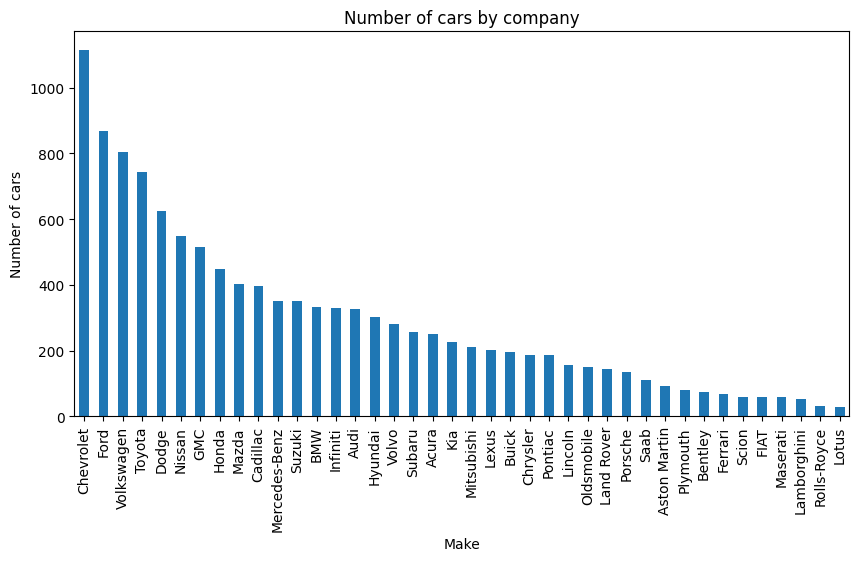

In [83]:
df.Make.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Number of cars by company")
plt.ylabel('Number of cars')
plt.xlabel('Make');

**Heat Map**

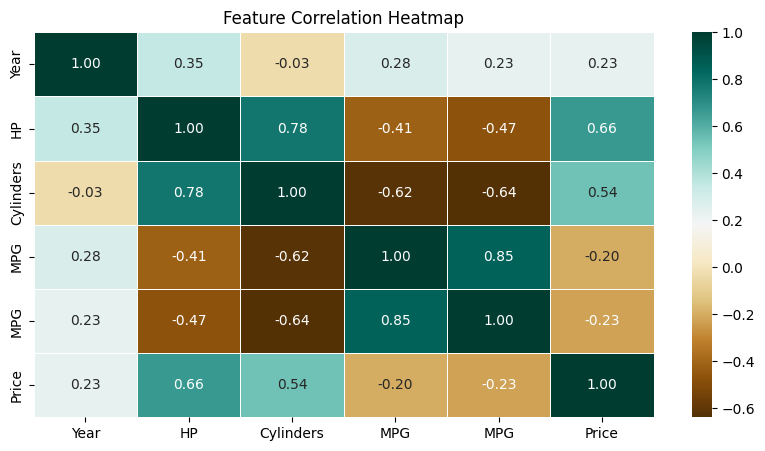

,Year,HP,Cylinders,MPG,MPG,Price
Year,1.000000,0.352885,-0.034368,0.280145,0.232385,0.227332
HP,0.352885,1.000000,0.779988,-0.414344,-0.466001,0.662269
Cylinders,-0.034368,0.779988,1.000000,-0.620346,-0.637872,0.544553
MPG,0.280145,-0.414344,-0.620346,1.000000,0.847044,-0.199271
MPG,0.232385,-0.466001,-0.637872,0.847044,1.000000,-0.225547
Price,0.227332,0.662269,0.544553,-0.199271,-0.225547,1.000000


In [85]:
corr_matrix = df_numeric.corr()
plt.figure(figsize=(10, 5))
sns.heatmap(corr_matrix, cmap="BrBG", annot=True, fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()
corr_matrix

Scatterplot

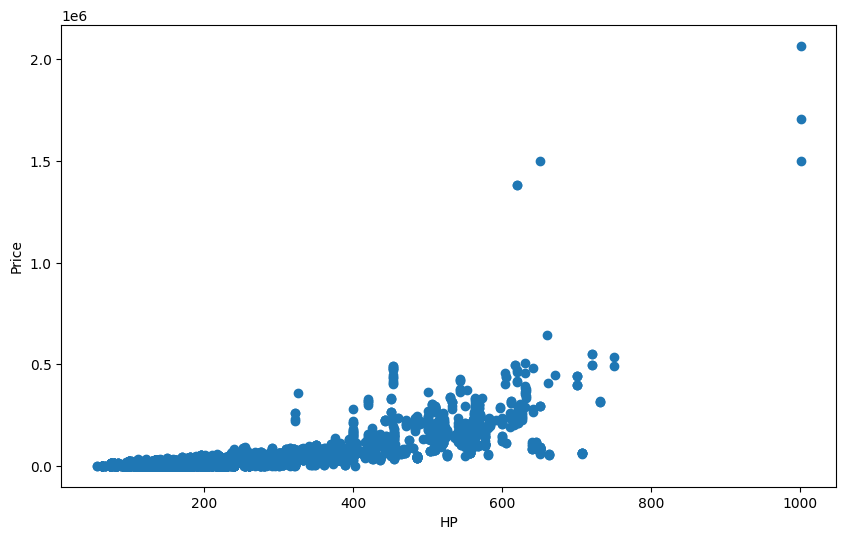

In [86]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'], df['Price'])
ax.set_xlabel('HP')
ax.set_ylabel('Price')
plt.show()

**Pie Chart**

In [92]:
import plotly.express as px
fig = px.pie(df, values='Price', names='Year', title='Price Distribution by Year')
fig.show()
